In [108]:
import numpy as np
import tensorflow as tf
from IPython.display import HTML, display
from google.colab import output
from PIL import Image
import io, base64


In [109]:
weights = np.load("weights.npy", allow_pickle=True).item()
biases = np.load("biases.npy", allow_pickle=True).item()


In [110]:
print(type(weights))
print(type(biases))


<class 'dict'>
<class 'dict'>


In [111]:
print(weights)
print(biases)


{'h1': <tf.Variable 'Variable:0' shape=(784, 128) dtype=float32, numpy=
array([[ 0.04389082,  0.04212753, -0.02272075, ..., -0.01972698,
         0.03416006,  0.01659265],
       [-0.05178702, -0.00656771,  0.06726297, ..., -0.00076178,
         0.06075729,  0.00936566],
       [ 0.00669835, -0.06465281, -0.04843031, ..., -0.01614841,
        -0.0084335 , -0.05952261],
       ...,
       [-0.01775488, -0.05686771,  0.04228744, ..., -0.01552574,
        -0.00144131,  0.01970086],
       [-0.04298013,  0.01044445,  0.05130633, ..., -0.10521525,
         0.15262674, -0.00875068],
       [-0.00267279,  0.02700721,  0.00545427, ..., -0.00810963,
        -0.0062525 ,  0.05807852]], dtype=float32)>, 'h2': <tf.Variable 'Variable:0' shape=(128, 256) dtype=float32, numpy=
array([[ 0.07070819,  0.03786955, -0.00768173, ..., -0.0149783 ,
         0.11117484, -0.02588185],
       [-0.01295144, -0.18219681, -0.1111581 , ..., -0.02320937,
         0.03075064,  0.01600291],
       [ 0.0048957 , -0.122

In [112]:
def neural_net(X):
    # Layer 1
    Z1 = np.dot(X, weights['h1'].numpy()) + biases['b1'].numpy()
    A1 = np.maximum(0, Z1)   # ReLU

    # Layer 2
    Z2 = np.dot(A1, weights['h2'].numpy()) + biases['b2'].numpy()
    A2 = np.maximum(0, Z2)   # ReLU

    # Output layer
    Z3 = np.dot(A2, weights['output'].numpy()) + biases['output'].numpy()

    # Softmax
    exp = np.exp(Z3 - np.max(Z3))
    return exp / np.sum(exp)


In [113]:
from IPython.display import display

def predict_digit(image_data):

    image = Image.open(io.BytesIO(image_data)).convert("L")
    image = image.resize((28, 28))


    print("🤖 Robot Vision:")
    display(image.resize((140, 140), resample=Image.NEAREST))


    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1, 784)


    prediction = neural_net(img)
    digit = int(np.argmax(prediction))
    confidence = np.max(prediction) * 100


    output.eval_js(f'document.getElementById("result").innerHTML = "🎯 Prediction: {digit} <br><small>({confidence:.1f}% sure)</small>"')

In [114]:
def save_image_callback(data):
    print("✔ Callback triggered")
    image_data = base64.b64decode(data.split(',')[1])
    predict_digit(image_data)


In [115]:

output.register_callback("saveImage", save_image_callback)

✔ Callback triggered
🤖 Robot Vision:


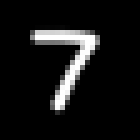

✔ Callback triggered
🤖 Robot Vision:


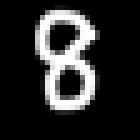

✔ Callback triggered
🤖 Robot Vision:


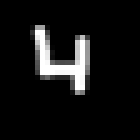

✔ Callback triggered
🤖 Robot Vision:


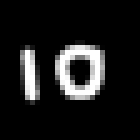

✔ Callback triggered
🤖 Robot Vision:


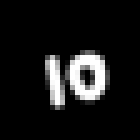

✔ Callback triggered
🤖 Robot Vision:


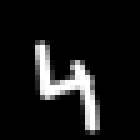

✔ Callback triggered
🤖 Robot Vision:


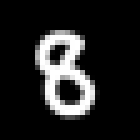

✔ Callback triggered
🤖 Robot Vision:


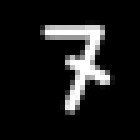

✔ Callback triggered
🤖 Robot Vision:


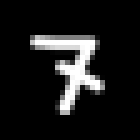

✔ Callback triggered
🤖 Robot Vision:


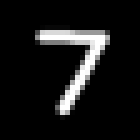

✔ Callback triggered
🤖 Robot Vision:


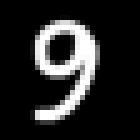

✔ Callback triggered
🤖 Robot Vision:


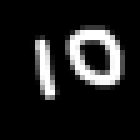

✔ Callback triggered
🤖 Robot Vision:


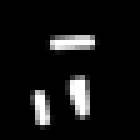

✔ Callback triggered
🤖 Robot Vision:


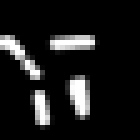

✔ Callback triggered
🤖 Robot Vision:


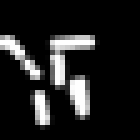

✔ Callback triggered
🤖 Robot Vision:


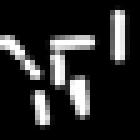

✔ Callback triggered
🤖 Robot Vision:


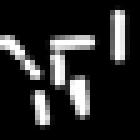

✔ Callback triggered
🤖 Robot Vision:


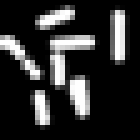

✔ Callback triggered
🤖 Robot Vision:


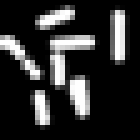

✔ Callback triggered
🤖 Robot Vision:


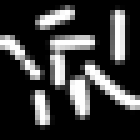

✔ Callback triggered
🤖 Robot Vision:


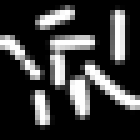

✔ Callback triggered
🤖 Robot Vision:


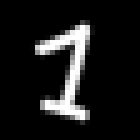

✔ Callback triggered
🤖 Robot Vision:


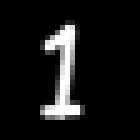

✔ Callback triggered
🤖 Robot Vision:


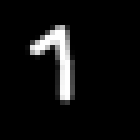

✔ Callback triggered
🤖 Robot Vision:


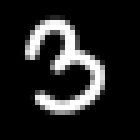

In [116]:
display(HTML('''
<div style="display: flex; align-items: flex-start; gap: 20px;">
    <div>
        <canvas id="canvas" width="280" height="280"
                style="border:3px solid #555; cursor: crosshair;"></canvas>
        <br><br>
        <button onclick="clearCanvas()">Clear</button>
        <button onclick="saveImage()">Predict</button>
    </div>
    <div id="result" style="font-size: 30px; margin-top: 100px;">
        Draw a digit...
    </div>
</div>

<script>
var canvas = document.getElementById("canvas");
var ctx = canvas.getContext("2d");
ctx.fillStyle = "black";
ctx.fillRect(0, 0, 280, 280);

let drawing = false;
canvas.onmousedown = () => drawing = true;
canvas.onmouseup = () => drawing = false;
canvas.onmouseleave = () => drawing = false;

canvas.onmousemove = function(e) {
  if (!drawing) return;
  ctx.fillStyle = "white";
  ctx.beginPath();
  ctx.arc(e.offsetX, e.offsetY, 12, 0, Math.PI * 2);
  ctx.fill();
}

function clearCanvas() {
  ctx.fillStyle = "black";
  ctx.fillRect(0, 0, 280, 280);
  document.getElementById("result").innerHTML = "Draw a digit...";
}

function saveImage() {
  var dataURL = canvas.toDataURL();
  google.colab.kernel.invokeFunction("saveImage", [dataURL], {});
}
</script>
'''))